In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import missingno
import glob
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn import metrics
from numpy import unique
from numpy import where
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage  
from sklearn.preprocessing import MinMaxScaler

## Reading Single data file

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Projects\Data_projects\slop\GWA-T-13_Materna-Workload-Traces\GWA-T-13_Materna-Workload-Traces\Materna-Trace-1\01.csv', sep=';')

In [3]:
df.head(10)

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,05.11.2015 00:00:00,2,0,156,"3,4",4194304,1050673,"25,05",0,14,54,12,45
1,05.11.2015 00:05:00,2,0,150,"3,27",4194304,1095552,"26,12",0,17,54,2,13
2,05.11.2015 00:10:00,2,0,158,"3,46",4194304,1025507,"24,45",0,15,54,12,45
3,05.11.2015 00:15:00,2,0,156,"3,4",4194304,992372,"23,66",0,16,54,3,12
4,05.11.2015 00:20:00,2,0,159,"3,47",4194304,1129107,"26,92",0,15,54,13,46
5,05.11.2015 00:25:00,2,0,152,"3,31",4194304,1092616,"26,05",0,15,54,2,11
6,05.11.2015 00:30:00,2,0,149,"3,25",4194304,958398,"22,85",0,13,54,2,11
7,05.11.2015 00:35:00,2,0,160,"3,5",4194304,1187827,"28,32",0,72,54,2,53
8,05.11.2015 00:40:00,2,0,156,"3,4",4194304,1101005,"26,25",0,14,54,12,45
9,05.11.2015 00:45:00,2,0,148,"3,23",4194304,1115265,"26,59",0,15,54,2,11


In [4]:
df.shape

(8352, 13)

## Checking Missing values

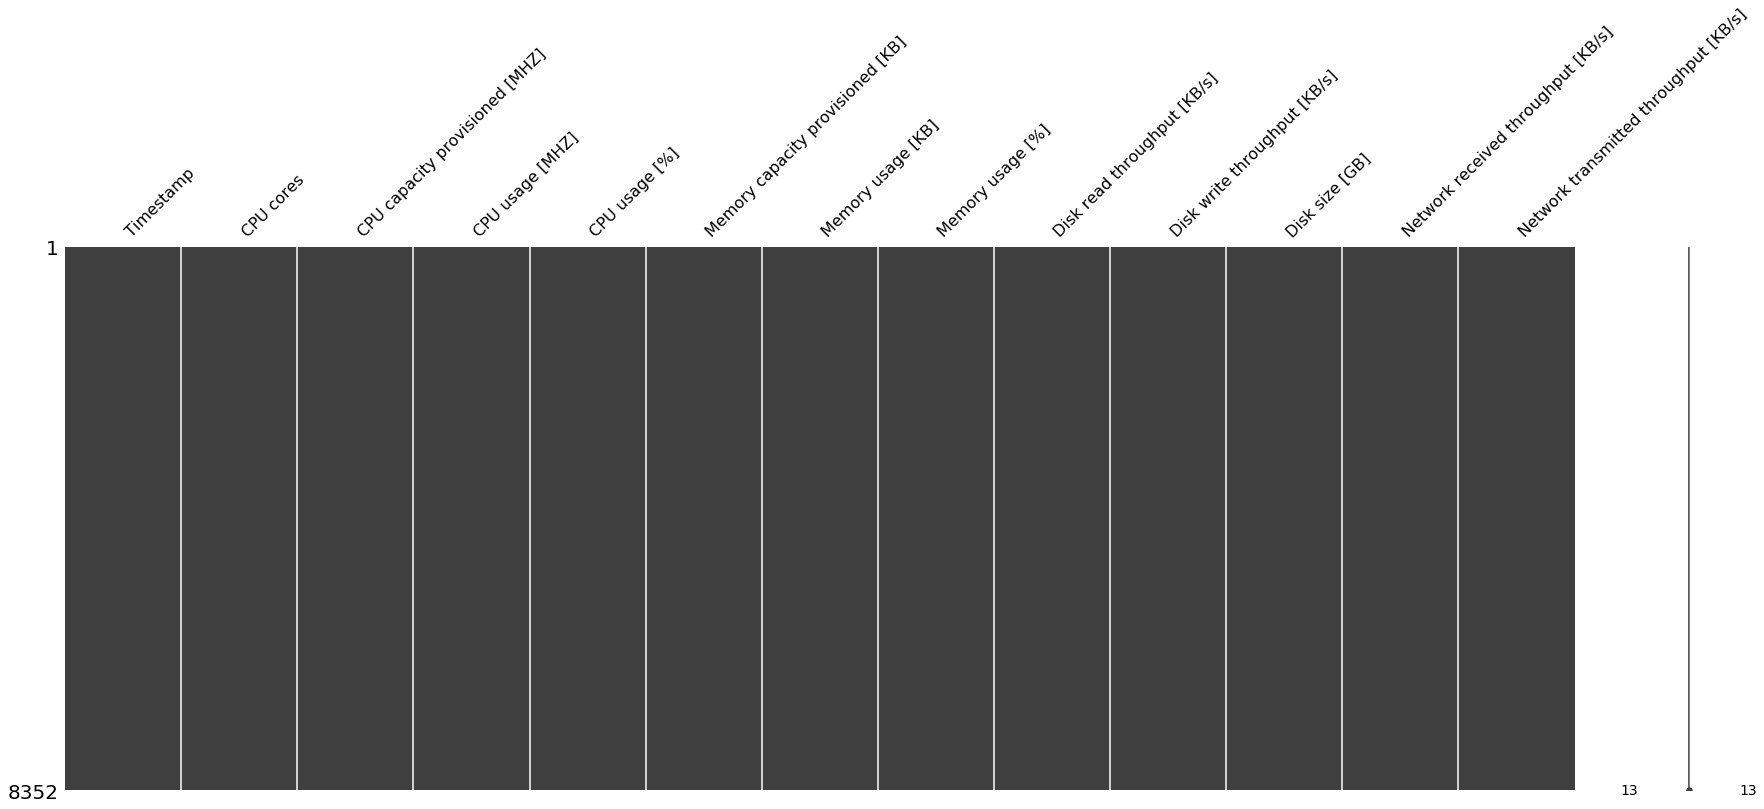

In [5]:
missingno.matrix(df, figsize = (30,10))

No missing values.

## Scaling Required data

In [6]:
df = df.replace(to_replace=r',', value='.', regex=True)

In [7]:
scale = df[['CPU usage [%]','Memory usage [%]']]

In [8]:
df_scaled = StandardScaler().fit_transform(scale)

## Normalizing the data

In [304]:
X_normalized = normalize(df_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
df_normalized = pd.DataFrame(X_normalized)

## K-Means Algorithm implementation

### Finding the optimal value for k

In [9]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

In [10]:
from scipy.spatial.distance import cdist 
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_scaled) 
    kmeanModel.fit(df_scaled)     
      
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [11]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 1.081553509137909
2 : 0.8862915628291583
3 : 0.40197140374316626
4 : 0.32779220970631284
5 : 0.26071492691476555
6 : 0.21095905999449235
7 : 0.17929854060319494
8 : 0.17042127838200774
9 : 0.1539374387992548


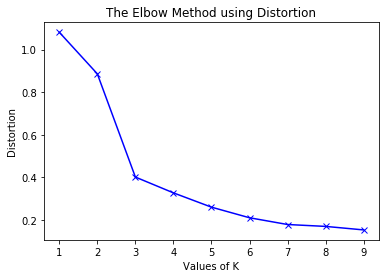

In [12]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [13]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

1 : 16704.000000000025
2 : 9154.468497004693
3 : 2809.3640660024957
4 : 1573.8293951615708
5 : 1047.2271888691257
6 : 743.0879221095397
7 : 589.3987063674803
8 : 471.7273867329922
9 : 398.7057222188808


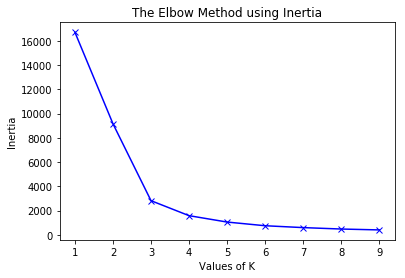

In [14]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In both plots, linear change can be obeserved after the point 3.
Hence 3 can be used as the optimal value for k (can be changed).

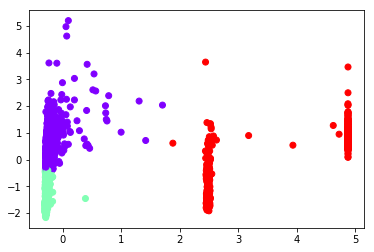

In [52]:
model = KMeans(n_clusters=3)
model.fit(df_scaled)
plt.scatter(df_scaled[:,0],df_scaled[:,1], c = model.labels_, cmap='rainbow')    
plt.show()

## Evaluating the model

In [297]:
clf = KMeans(n_clusters=3, init="random", n_init=3).fit(df_scaled)

In [ ]:
#metrics.silhouette_score(df_scaled, model.fit_predict(df_scaled), metric='euclidean')

In [317]:
dbs_kmeans = metrics.davies_bouldin_score(df_scaled, model.labels_)
metrics.davies_bouldin_score(df_scaled, model.labels_)

0.48611591519554337

In [311]:
chs_kmeans = metrics.calinski_harabasz_score(df_scaled, model.labels_)
metrics.calinski_harabasz_score(df_scaled, model.labels_)

20646.36563427176

## Performing PCA 

In [305]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_normalized)

([<matplotlib.axis.XTick at 0x1a49df50>,
 <a list of 2 Text xticklabel objects>)

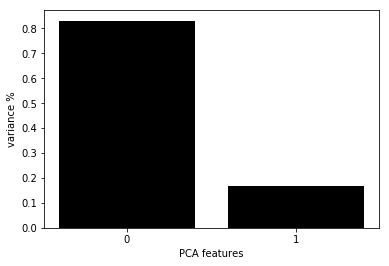

In [306]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [307]:
pca_data = pca.fit_transform(X_normalized)

In [308]:
PCA_components = pd.DataFrame(pca_data)

Text(0, 0.5, 'PCA 2')

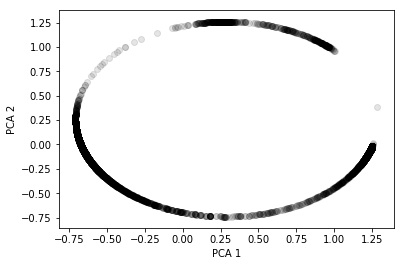

In [309]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Implementing AgglomerativeClustering

### Finding optimal n_clusters value

In [277]:
from sklearn.cluster import AgglomerativeClustering
for i in range(2,6):
    print('n_clusters: '+ str(i))
    ac = AgglomerativeClustering(n_clusters = i)
    print('Davies_bouldin_score: ' + str(metrics.davies_bouldin_score(PCA_components, ac.fit_predict(PCA_components))))
    print('calinski_harabasz_score: ' + str(metrics.calinski_harabasz_score(PCA_components, ac.fit_predict(PCA_components))))

n_clusters: 2
Davies_bouldin_score: 0.41332650903276175
calinski_harabasz_score: 28482.23042865951
n_clusters: 3
Davies_bouldin_score: 0.3170839448630512
calinski_harabasz_score: 45073.82630125609
n_clusters: 4
Davies_bouldin_score: 0.4647943686546445
calinski_harabasz_score: 56714.41427715758
n_clusters: 5
Davies_bouldin_score: 0.44621904591811595
calinski_harabasz_score: 54539.536147783896


From the above results, 4 can be chosed as the optimal value(can be changed).

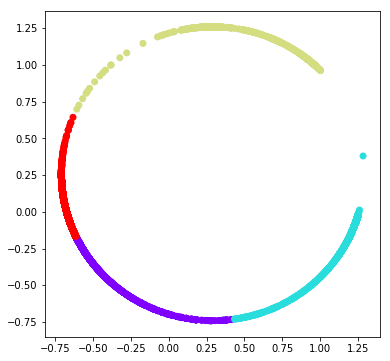

In [278]:
ac = AgglomerativeClustering(n_clusters = 4) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(PCA_components[0], PCA_components[1],  
           c = ac.fit_predict(PCA_components), cmap ='rainbow') 
plt.show()

In [324]:
chs_ac = 56714.41427715758
dbs_ac = 0.4647943686546445

## Implementing DBSCAN algorithm

In [140]:
from sklearn.cluster import DBSCAN 

In [254]:
db_default = DBSCAN(eps = 0.0375, min_samples = 50).fit(PCA_components) 
labels = db_default.labels_

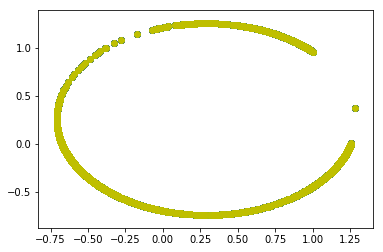

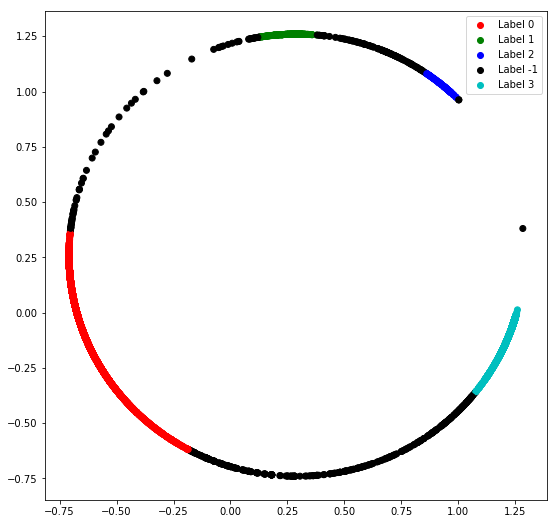

In [286]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
colours[3] = 'c'
colours[4] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(PCA_components[0], PCA_components[1], color ='r'); 
g = plt.scatter(PCA_components[0], PCA_components[1], color ='g'); 
b = plt.scatter(PCA_components[0], PCA_components[1], color ='b'); 
k = plt.scatter(PCA_components[0], PCA_components[1], color ='k');
c = plt.scatter(PCA_components[0], PCA_components[1], color ='c'); 
y = plt.scatter(PCA_components[0], PCA_components[1], color ='y'); 
  
# Plotting 0 on the X-Axis and 1 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(PCA_components[0], PCA_components[1], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k, c,), ('Label 0', 'Label 1', 'Label 2', 'Label -1', 'Label 3')) 
  
plt.show() 

In [321]:
dbs_dbscan = float(metrics.davies_bouldin_score(PCA_components, labels))
metrics.davies_bouldin_score(PCA_components, labels)

0.9979701787086214

In [322]:
chs_dbscan = float(metrics.calinski_harabasz_score(PCA_components, labels))
metrics.calinski_harabasz_score(PCA_components, labels)

16236.430570612782

## Plotting evaluation metrics

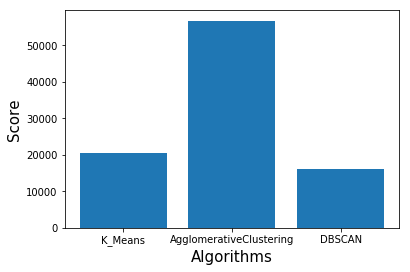

In [358]:
plt.bar(['K_Means','AgglomerativeClustering', 'DBSCAN'], [chs_kmeans, chs_ac, chs_dbscan])
plt.xlabel('Algorithms', fontsize = 15) 
plt.ylabel('Score', fontsize = 15) 
plt.show()

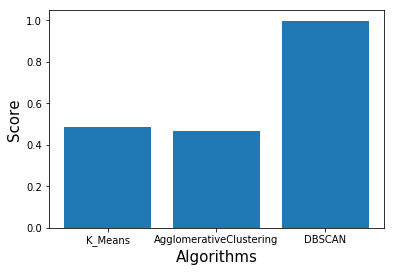

In [359]:
plt.bar(['K_Means','AgglomerativeClustering', 'DBSCAN'], [dbs_kmeans, dbs_ac, dbs_dbscan])
plt.xlabel('Algorithms', fontsize = 15) 
plt.ylabel('Score', fontsize = 15) 
plt.show()